In [7]:
import pandas as pd
import matplotlib.pyplot as mtp
import numpy as nm
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score


In [8]:
data=pd.read_csv("C:\\Users\\R Durga Bhavani\\Downloads\\Churn_Modelling.csv")

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [10]:
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [11]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [12]:
data.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


<Axes: xlabel='Exited', ylabel='count'>

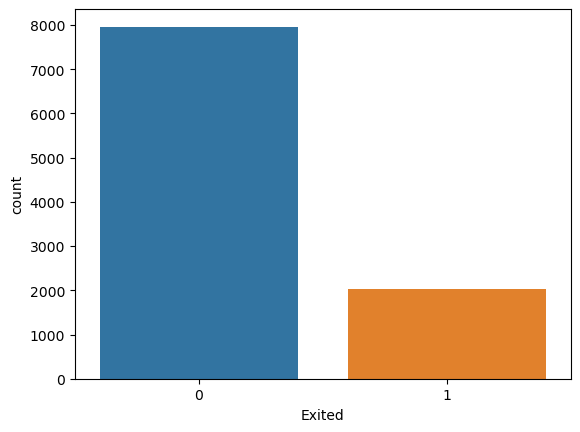

In [13]:
sns.countplot(data=data,x='Exited')

<Axes: xlabel='Gender', ylabel='count'>

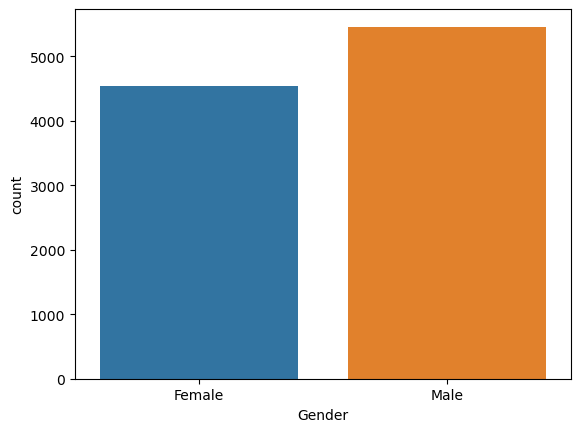

In [14]:
sns.countplot(data=data,x='Gender')

C:\Users\R Durga Bhavani\AppData\Local\Temp\ipykernel_25196\4074123847.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = data.corr()


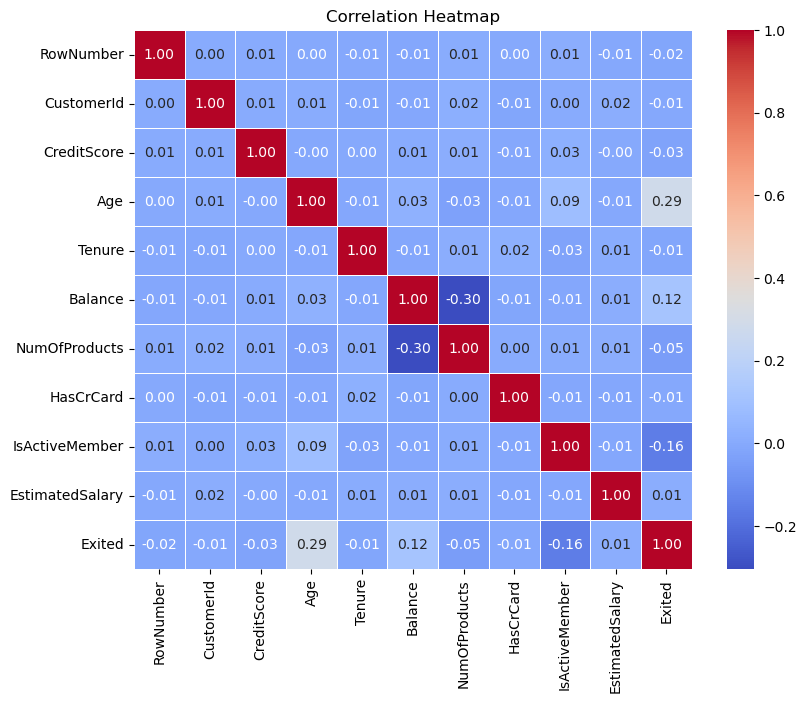

In [15]:
correlation = data.corr()
mtp.figure(figsize=(9, 7))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.4)
mtp.title('Correlation Heatmap')
mtp.show()

In [16]:
data=data.drop(columns= ['RowNumber','CustomerId','Surname'])

In [17]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [18]:
data = pd.get_dummies(data,columns=['Geography','Gender'],drop_first=True)

In [19]:
x = data.drop(columns=['Exited'])
y = data['Exited']

In [20]:
x.shape

(10000, 11)

In [21]:
y.shape

(10000,)

In [22]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [23]:
x_train.shape

(8000, 11)

In [24]:
x_test.shape

(2000, 11)

In [25]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

In [26]:
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression(random_state=0)
classifier.fit(x_train,y_train)

LogisticRegression(random_state=0)

In [27]:
predict=classifier.predict(x_test)

In [28]:
# Predicting customer churn:
for i in predict[0:20]:
    if i == 0:
        print("Customer Will Not Churn")
    else:
        print("Customer Will Churn")

Customer Will Not Churn
Customer Will Not Churn
Customer Will Not Churn
Customer Will Not Churn
Customer Will Not Churn
Customer Will Churn
Customer Will Not Churn
Customer Will Not Churn
Customer Will Not Churn
Customer Will Churn
Customer Will Not Churn
Customer Will Not Churn
Customer Will Not Churn
Customer Will Not Churn
Customer Will Not Churn
Customer Will Not Churn
Customer Will Not Churn
Customer Will Not Churn
Customer Will Not Churn
Customer Will Not Churn


In [29]:
y_pred= classifier.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

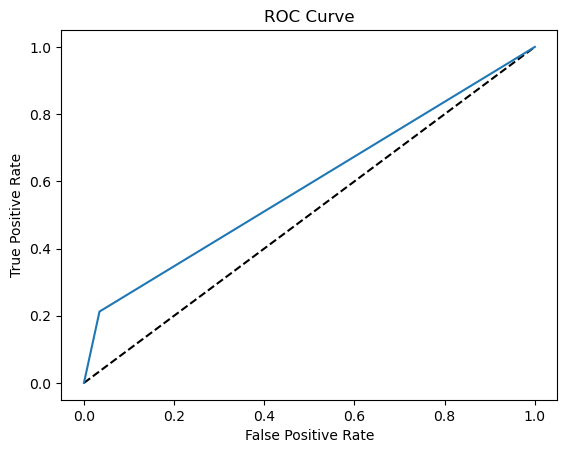

In [30]:
from sklearn.metrics import roc_curve
# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# Plot ROC curve
mtp.plot([0, 1], [0, 1], 'k--')
mtp.plot(fpr, tpr)
mtp.xlabel('False Positive Rate')
mtp.ylabel('True Positive Rate')
mtp.title('ROC Curve')
mtp.show()


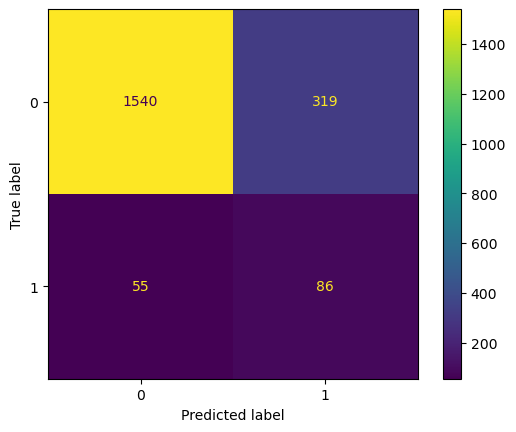

In [31]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(y_pred,y_test)
ConfusionMatrixDisplay.from_predictions(y_pred, y_test)
mtp.show()

In [32]:
from sklearn import metrics
Accuracy = metrics.accuracy_score(y_test, y_pred)
print(Accuracy)

0.813


In [33]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

           0       0.83      0.97      0.89      1595
           1       0.61      0.21      0.32       405

    accuracy                           0.81      2000
   macro avg       0.72      0.59      0.60      2000
weighted avg       0.78      0.81      0.77      2000

